In [1]:
import import_ipynb
from Custom_lossFunction import *
import pandas
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras import Model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import concatenate
import numpy
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras import layers
tf.keras.backend.set_floatx('float64')

importing Jupyter notebook from Custom_lossFunction.ipynb
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60. 62. 64. 66. 68. 70.
 72. 74. 76. 78. 80. 82. 84. 86. 88. 90. 92. 94. 96. 98.]
4900
-231.21019022570107
-890.7847980596202
6.530612244897961e-07


# How to run: 
1. Specify variables J,z,t,s,t_individual, and their lenghts
2. Using that the lenght of the tensorproduct of J and z, put that number of zeros in Y
3. Execute

In [2]:
z1 = np.arange(0.01,0.99,1/1000)
J1 = np.arange(0,100,2.0)


J1 = J/(J+2)


#standard scaling
# J1 = J.reshape((len(J1), 1))
# scaler = MinMaxScaler()
# scaler.fit(J1)
# J1 = scaler.transform(J1)
# print(J1.shape)

X = []
X = [[j, Z] for Z in z for j in J1]
#X = [[j, Z] for Z in z1 for j in J1]

X = np.array(X)
print(X.shape)

Y = np.zeros((X.shape[0],1))
print(Y.shape)
print(np.kron(J,z).shape[0])

(4900, 2)
(4900, 1)
4900


In [3]:
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(Input(shape=(2)))
#study activation functions
model.add(layers.Dense(5, activation='relu', kernel_initializer=keras.initializers.Constant(0.5)))
model.add(layers.Dense(3, activation='relu', kernel_initializer=keras.initializers.Constant(0.5)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.Constant(0.5))) #make sure its between 0 and 1



In [4]:
# loss_fn = Custom_Loss_Function()
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adagrad(learning_rate=lr_schedule)
model.compile(optimizer =opt, loss=Custom_Loss_Function, metrics=['accuracy'])

In [5]:
history_callback = model.fit(X, Y, epochs=5000, batch_size=np.kron(J,z).shape[0], verbose=2)
loss_history = history_callback.history["loss"]

Epoch 1/5000
1/1 - 0s - loss: 435206324224.0000 - accuracy: 0.0000e+00
Epoch 2/5000
1/1 - 0s - loss: 422721421312.0000 - accuracy: 6.1224e-04
Epoch 3/5000
1/1 - 0s - loss: 407039868928.0000 - accuracy: 0.0012
Epoch 4/5000
1/1 - 0s - loss: 410919305216.0000 - accuracy: 0.0016
Epoch 5/5000
1/1 - 0s - loss: 379606466560.0000 - accuracy: 0.0022
Epoch 6/5000
1/1 - 0s - loss: 368916692992.0000 - accuracy: 0.0027
Epoch 7/5000
1/1 - 0s - loss: 360225669120.0000 - accuracy: 0.0033
Epoch 8/5000
1/1 - 0s - loss: 378084261888.0000 - accuracy: 0.0037
Epoch 9/5000
1/1 - 0s - loss: 346640678912.0000 - accuracy: 0.0039
Epoch 10/5000
1/1 - 0s - loss: 365963313152.0000 - accuracy: 0.0043
Epoch 11/5000
1/1 - 0s - loss: 347398275072.0000 - accuracy: 0.0047
Epoch 12/5000
1/1 - 0s - loss: 337472421888.0000 - accuracy: 0.0051
Epoch 13/5000
1/1 - 0s - loss: 320038895616.0000 - accuracy: 0.0055
Epoch 14/5000
1/1 - 0s - loss: 307558055936.0000 - accuracy: 0.0059
Epoch 15/5000
1/1 - 0s - loss: 306501713920.0000 

Epoch 122/5000
1/1 - 0s - loss: 80967630848.0000 - accuracy: 0.8180
Epoch 123/5000
1/1 - 0s - loss: 83806150656.0000 - accuracy: 0.8265
Epoch 124/5000
1/1 - 0s - loss: 80207454208.0000 - accuracy: 0.8365
Epoch 125/5000
1/1 - 0s - loss: 80152846336.0000 - accuracy: 0.8457
Epoch 126/5000
1/1 - 0s - loss: 83468738560.0000 - accuracy: 0.8547
Epoch 127/5000
1/1 - 0s - loss: 81279492096.0000 - accuracy: 0.8647
Epoch 128/5000
1/1 - 0s - loss: 78189404160.0000 - accuracy: 0.8745
Epoch 129/5000
1/1 - 0s - loss: 80642596864.0000 - accuracy: 0.8820
Epoch 130/5000
1/1 - 0s - loss: 76987088896.0000 - accuracy: 0.8922
Epoch 131/5000
1/1 - 0s - loss: 77777100800.0000 - accuracy: 0.8994
Epoch 132/5000
1/1 - 0s - loss: 78253228032.0000 - accuracy: 0.9084
Epoch 133/5000
1/1 - 0s - loss: 80269344768.0000 - accuracy: 0.9171
Epoch 134/5000
1/1 - 0s - loss: 75905024000.0000 - accuracy: 0.9278
Epoch 135/5000
1/1 - 0s - loss: 77705199616.0000 - accuracy: 0.9355
Epoch 136/5000
1/1 - 0s - loss: 79146344448.0000

Epoch 243/5000
1/1 - 0s - loss: 58388905984.0000 - accuracy: 1.0000
Epoch 244/5000
1/1 - 0s - loss: 58216869888.0000 - accuracy: 1.0000
Epoch 245/5000
1/1 - 0s - loss: 58400890880.0000 - accuracy: 1.0000
Epoch 246/5000
1/1 - 0s - loss: 58049306624.0000 - accuracy: 1.0000
Epoch 247/5000
1/1 - 0s - loss: 57940697088.0000 - accuracy: 1.0000
Epoch 248/5000
1/1 - 0s - loss: 58085732352.0000 - accuracy: 1.0000
Epoch 249/5000
1/1 - 0s - loss: 57729126400.0000 - accuracy: 1.0000
Epoch 250/5000
1/1 - 0s - loss: 57761288192.0000 - accuracy: 1.0000
Epoch 251/5000
1/1 - 0s - loss: 57476235264.0000 - accuracy: 1.0000
Epoch 252/5000
1/1 - 0s - loss: 57562877952.0000 - accuracy: 1.0000
Epoch 253/5000
1/1 - 0s - loss: 57428582400.0000 - accuracy: 1.0000
Epoch 254/5000
1/1 - 0s - loss: 57547390976.0000 - accuracy: 1.0000
Epoch 255/5000
1/1 - 0s - loss: 57423224832.0000 - accuracy: 1.0000
Epoch 256/5000
1/1 - 0s - loss: 57780764672.0000 - accuracy: 1.0000
Epoch 257/5000
1/1 - 0s - loss: 57378107392.0000

Epoch 364/5000
1/1 - 0s - loss: 51727814656.0000 - accuracy: 1.0000
Epoch 365/5000
1/1 - 0s - loss: 51725160448.0000 - accuracy: 1.0000
Epoch 366/5000
1/1 - 0s - loss: 51729227776.0000 - accuracy: 1.0000
Epoch 367/5000
1/1 - 0s - loss: 51701620736.0000 - accuracy: 1.0000
Epoch 368/5000
1/1 - 0s - loss: 51575246848.0000 - accuracy: 1.0000
Epoch 369/5000
1/1 - 0s - loss: 51507105792.0000 - accuracy: 1.0000
Epoch 370/5000
1/1 - 0s - loss: 51545559040.0000 - accuracy: 1.0000
Epoch 371/5000
1/1 - 0s - loss: 51455254528.0000 - accuracy: 1.0000
Epoch 372/5000
1/1 - 0s - loss: 51433185280.0000 - accuracy: 1.0000
Epoch 373/5000
1/1 - 0s - loss: 51387408384.0000 - accuracy: 1.0000
Epoch 374/5000
1/1 - 0s - loss: 51297988608.0000 - accuracy: 1.0000
Epoch 375/5000
1/1 - 0s - loss: 51272040448.0000 - accuracy: 1.0000
Epoch 376/5000
1/1 - 0s - loss: 51229220864.0000 - accuracy: 1.0000
Epoch 377/5000
1/1 - 0s - loss: 51204231168.0000 - accuracy: 1.0000
Epoch 378/5000
1/1 - 0s - loss: 51150807040.0000

Epoch 485/5000
1/1 - 0s - loss: 47238619136.0000 - accuracy: 1.0000
Epoch 486/5000
1/1 - 0s - loss: 47205752832.0000 - accuracy: 1.0000
Epoch 487/5000
1/1 - 0s - loss: 47158362112.0000 - accuracy: 1.0000
Epoch 488/5000
1/1 - 0s - loss: 47158796288.0000 - accuracy: 1.0000
Epoch 489/5000
1/1 - 0s - loss: 47101378560.0000 - accuracy: 1.0000
Epoch 490/5000
1/1 - 0s - loss: 47091757056.0000 - accuracy: 1.0000
Epoch 491/5000
1/1 - 0s - loss: 47035953152.0000 - accuracy: 1.0000
Epoch 492/5000
1/1 - 0s - loss: 46995656704.0000 - accuracy: 1.0000
Epoch 493/5000
1/1 - 0s - loss: 46971592704.0000 - accuracy: 1.0000
Epoch 494/5000
1/1 - 0s - loss: 46957244416.0000 - accuracy: 1.0000
Epoch 495/5000
1/1 - 0s - loss: 46897369088.0000 - accuracy: 1.0000
Epoch 496/5000
1/1 - 0s - loss: 46883262464.0000 - accuracy: 1.0000
Epoch 497/5000
1/1 - 0s - loss: 46845923328.0000 - accuracy: 1.0000
Epoch 498/5000
1/1 - 0s - loss: 46822785024.0000 - accuracy: 1.0000
Epoch 499/5000
1/1 - 0s - loss: 46796988416.0000

Epoch 606/5000
1/1 - 0s - loss: 43581259776.0000 - accuracy: 1.0000
Epoch 607/5000
1/1 - 0s - loss: 43540701184.0000 - accuracy: 1.0000
Epoch 608/5000
1/1 - 0s - loss: 43525361664.0000 - accuracy: 1.0000
Epoch 609/5000
1/1 - 0s - loss: 43486924800.0000 - accuracy: 1.0000
Epoch 610/5000
1/1 - 0s - loss: 43467010048.0000 - accuracy: 1.0000
Epoch 611/5000
1/1 - 0s - loss: 43435679744.0000 - accuracy: 1.0000
Epoch 612/5000
1/1 - 0s - loss: 43405078528.0000 - accuracy: 1.0000
Epoch 613/5000
1/1 - 0s - loss: 43381846016.0000 - accuracy: 1.0000
Epoch 614/5000
1/1 - 0s - loss: 43348131840.0000 - accuracy: 1.0000
Epoch 615/5000
1/1 - 0s - loss: 43317121024.0000 - accuracy: 1.0000
Epoch 616/5000
1/1 - 0s - loss: 43302703104.0000 - accuracy: 1.0000
Epoch 617/5000
1/1 - 0s - loss: 43276201984.0000 - accuracy: 1.0000
Epoch 618/5000
1/1 - 0s - loss: 43242000384.0000 - accuracy: 1.0000
Epoch 619/5000
1/1 - 0s - loss: 43218685952.0000 - accuracy: 1.0000
Epoch 620/5000
1/1 - 0s - loss: 43190726656.0000

Epoch 727/5000
1/1 - 0s - loss: 40457281536.0000 - accuracy: 1.0000
Epoch 728/5000
1/1 - 0s - loss: 40436367360.0000 - accuracy: 1.0000
Epoch 729/5000
1/1 - 0s - loss: 40413741056.0000 - accuracy: 1.0000
Epoch 730/5000
1/1 - 0s - loss: 40390549504.0000 - accuracy: 1.0000
Epoch 731/5000
1/1 - 0s - loss: 40365457408.0000 - accuracy: 1.0000
Epoch 732/5000
1/1 - 0s - loss: 40341368832.0000 - accuracy: 1.0000
Epoch 733/5000
1/1 - 0s - loss: 40316280832.0000 - accuracy: 1.0000
Epoch 734/5000
1/1 - 0s - loss: 40295120896.0000 - accuracy: 1.0000
Epoch 735/5000
1/1 - 0s - loss: 40268783616.0000 - accuracy: 1.0000
Epoch 736/5000
1/1 - 0s - loss: 40248856576.0000 - accuracy: 1.0000
Epoch 737/5000
1/1 - 0s - loss: 40218079232.0000 - accuracy: 1.0000
Epoch 738/5000
1/1 - 0s - loss: 40201396224.0000 - accuracy: 1.0000
Epoch 739/5000
1/1 - 0s - loss: 40175665152.0000 - accuracy: 1.0000
Epoch 740/5000
1/1 - 0s - loss: 40152850432.0000 - accuracy: 1.0000
Epoch 741/5000
1/1 - 0s - loss: 40128237568.0000

Epoch 848/5000
1/1 - 0s - loss: 37749743616.0000 - accuracy: 1.0000
Epoch 849/5000
1/1 - 0s - loss: 37727191040.0000 - accuracy: 1.0000
Epoch 850/5000
1/1 - 0s - loss: 37708918784.0000 - accuracy: 1.0000
Epoch 851/5000
1/1 - 0s - loss: 37689434112.0000 - accuracy: 1.0000
Epoch 852/5000
1/1 - 0s - loss: 37667115008.0000 - accuracy: 1.0000
Epoch 853/5000
1/1 - 0s - loss: 37645963264.0000 - accuracy: 1.0000
Epoch 854/5000
1/1 - 0s - loss: 37625233408.0000 - accuracy: 1.0000
Epoch 855/5000
1/1 - 0s - loss: 37604966400.0000 - accuracy: 1.0000
Epoch 856/5000
1/1 - 0s - loss: 37582708736.0000 - accuracy: 1.0000
Epoch 857/5000
1/1 - 0s - loss: 37562261504.0000 - accuracy: 1.0000
Epoch 858/5000
1/1 - 0s - loss: 37542621184.0000 - accuracy: 1.0000
Epoch 859/5000
1/1 - 0s - loss: 37521539072.0000 - accuracy: 1.0000
Epoch 860/5000
1/1 - 0s - loss: 37500116992.0000 - accuracy: 1.0000
Epoch 861/5000
1/1 - 0s - loss: 37480210432.0000 - accuracy: 1.0000
Epoch 862/5000
1/1 - 0s - loss: 37457379328.0000

Epoch 969/5000
1/1 - 0s - loss: 35359490048.0000 - accuracy: 1.0000
Epoch 970/5000
1/1 - 0s - loss: 35338842112.0000 - accuracy: 1.0000
Epoch 971/5000
1/1 - 0s - loss: 35320967168.0000 - accuracy: 1.0000
Epoch 972/5000
1/1 - 0s - loss: 35302518784.0000 - accuracy: 1.0000
Epoch 973/5000
1/1 - 0s - loss: 35285504000.0000 - accuracy: 1.0000
Epoch 974/5000
1/1 - 0s - loss: 35266093056.0000 - accuracy: 1.0000
Epoch 975/5000
1/1 - 0s - loss: 35247456256.0000 - accuracy: 1.0000
Epoch 976/5000
1/1 - 0s - loss: 35228606464.0000 - accuracy: 1.0000
Epoch 977/5000
1/1 - 0s - loss: 35209809920.0000 - accuracy: 1.0000
Epoch 978/5000
1/1 - 0s - loss: 35193819136.0000 - accuracy: 1.0000
Epoch 979/5000
1/1 - 0s - loss: 35173228544.0000 - accuracy: 1.0000
Epoch 980/5000
1/1 - 0s - loss: 35155746816.0000 - accuracy: 1.0000
Epoch 981/5000
1/1 - 0s - loss: 35135946752.0000 - accuracy: 1.0000
Epoch 982/5000
1/1 - 0s - loss: 35117424640.0000 - accuracy: 1.0000
Epoch 983/5000
1/1 - 0s - loss: 35100794880.0000

Epoch 1089/5000
1/1 - 0s - loss: 33239431168.0000 - accuracy: 1.0000
Epoch 1090/5000
1/1 - 0s - loss: 33224396800.0000 - accuracy: 1.0000
Epoch 1091/5000
1/1 - 0s - loss: 33206181888.0000 - accuracy: 1.0000
Epoch 1092/5000
1/1 - 0s - loss: 33188245504.0000 - accuracy: 1.0000
Epoch 1093/5000
1/1 - 0s - loss: 33172920320.0000 - accuracy: 1.0000
Epoch 1094/5000
1/1 - 0s - loss: 33156206592.0000 - accuracy: 1.0000
Epoch 1095/5000
1/1 - 0s - loss: 33139644416.0000 - accuracy: 1.0000
Epoch 1096/5000
1/1 - 0s - loss: 33122244608.0000 - accuracy: 1.0000
Epoch 1097/5000
1/1 - 0s - loss: 33106368512.0000 - accuracy: 1.0000
Epoch 1098/5000
1/1 - 0s - loss: 33090201600.0000 - accuracy: 1.0000
Epoch 1099/5000
1/1 - 0s - loss: 33074112512.0000 - accuracy: 1.0000
Epoch 1100/5000
1/1 - 0s - loss: 33057394688.0000 - accuracy: 1.0000
Epoch 1101/5000
1/1 - 0s - loss: 33039757312.0000 - accuracy: 1.0000
Epoch 1102/5000
1/1 - 0s - loss: 33023338496.0000 - accuracy: 1.0000
Epoch 1103/5000
1/1 - 0s - loss: 3

Epoch 1208/5000
1/1 - 0s - loss: 31345059840.0000 - accuracy: 1.0000
Epoch 1209/5000
1/1 - 0s - loss: 31330099200.0000 - accuracy: 1.0000
Epoch 1210/5000
1/1 - 0s - loss: 31315109888.0000 - accuracy: 1.0000
Epoch 1211/5000
1/1 - 0s - loss: 31299356672.0000 - accuracy: 1.0000
Epoch 1212/5000
1/1 - 0s - loss: 31284527104.0000 - accuracy: 1.0000
Epoch 1213/5000
1/1 - 0s - loss: 31269576704.0000 - accuracy: 1.0000
Epoch 1214/5000
1/1 - 0s - loss: 31254919168.0000 - accuracy: 1.0000
Epoch 1215/5000
1/1 - 0s - loss: 31239276544.0000 - accuracy: 1.0000
Epoch 1216/5000
1/1 - 0s - loss: 31224778752.0000 - accuracy: 1.0000
Epoch 1217/5000
1/1 - 0s - loss: 31209713664.0000 - accuracy: 1.0000
Epoch 1218/5000
1/1 - 0s - loss: 31193995264.0000 - accuracy: 1.0000
Epoch 1219/5000
1/1 - 0s - loss: 31178905600.0000 - accuracy: 1.0000
Epoch 1220/5000
1/1 - 0s - loss: 31164229632.0000 - accuracy: 1.0000
Epoch 1221/5000
1/1 - 0s - loss: 31149060096.0000 - accuracy: 1.0000
Epoch 1222/5000
1/1 - 0s - loss: 3

Epoch 1327/5000
1/1 - 0s - loss: 29623054336.0000 - accuracy: 1.0000
Epoch 1328/5000
1/1 - 0s - loss: 29609379840.0000 - accuracy: 1.0000
Epoch 1329/5000
1/1 - 0s - loss: 29595504640.0000 - accuracy: 1.0000
Epoch 1330/5000
1/1 - 0s - loss: 29581617152.0000 - accuracy: 1.0000
Epoch 1331/5000
1/1 - 0s - loss: 29567981568.0000 - accuracy: 1.0000
Epoch 1332/5000
1/1 - 0s - loss: 29554458624.0000 - accuracy: 1.0000
Epoch 1333/5000
1/1 - 0s - loss: 29540427776.0000 - accuracy: 1.0000
Epoch 1334/5000
1/1 - 0s - loss: 29527056384.0000 - accuracy: 1.0000
Epoch 1335/5000
1/1 - 0s - loss: 29512837120.0000 - accuracy: 1.0000
Epoch 1336/5000
1/1 - 0s - loss: 29498857472.0000 - accuracy: 1.0000
Epoch 1337/5000
1/1 - 0s - loss: 29485744128.0000 - accuracy: 1.0000
Epoch 1338/5000
1/1 - 0s - loss: 29471342592.0000 - accuracy: 1.0000
Epoch 1339/5000
1/1 - 0s - loss: 29458305024.0000 - accuracy: 1.0000
Epoch 1340/5000
1/1 - 0s - loss: 29444249600.0000 - accuracy: 1.0000
Epoch 1341/5000
1/1 - 0s - loss: 2

Epoch 1446/5000
1/1 - 0s - loss: 28049356800.0000 - accuracy: 1.0000
Epoch 1447/5000
1/1 - 0s - loss: 28036593664.0000 - accuracy: 1.0000
Epoch 1448/5000
1/1 - 0s - loss: 28023531520.0000 - accuracy: 1.0000
Epoch 1449/5000
1/1 - 0s - loss: 28011147264.0000 - accuracy: 1.0000
Epoch 1450/5000
1/1 - 0s - loss: 27998732288.0000 - accuracy: 1.0000
Epoch 1451/5000
1/1 - 0s - loss: 27986063360.0000 - accuracy: 1.0000
Epoch 1452/5000
1/1 - 0s - loss: 27973130240.0000 - accuracy: 1.0000
Epoch 1453/5000
1/1 - 0s - loss: 27960463360.0000 - accuracy: 1.0000
Epoch 1454/5000
1/1 - 0s - loss: 27948236800.0000 - accuracy: 1.0000
Epoch 1455/5000
1/1 - 0s - loss: 27935705088.0000 - accuracy: 1.0000
Epoch 1456/5000
1/1 - 0s - loss: 27923134464.0000 - accuracy: 1.0000
Epoch 1457/5000
1/1 - 0s - loss: 27910764544.0000 - accuracy: 1.0000
Epoch 1458/5000
1/1 - 0s - loss: 27897735168.0000 - accuracy: 1.0000
Epoch 1459/5000
1/1 - 0s - loss: 27885488128.0000 - accuracy: 1.0000
Epoch 1460/5000
1/1 - 0s - loss: 2

Epoch 1565/5000
1/1 - 0s - loss: 26603130880.0000 - accuracy: 1.0000
Epoch 1566/5000
1/1 - 0s - loss: 26591330304.0000 - accuracy: 1.0000
Epoch 1567/5000
1/1 - 0s - loss: 26579836928.0000 - accuracy: 1.0000
Epoch 1568/5000
1/1 - 0s - loss: 26567995392.0000 - accuracy: 1.0000
Epoch 1569/5000
1/1 - 0s - loss: 26556395520.0000 - accuracy: 1.0000
Epoch 1570/5000
1/1 - 0s - loss: 26544949248.0000 - accuracy: 1.0000
Epoch 1571/5000
1/1 - 0s - loss: 26533384192.0000 - accuracy: 1.0000
Epoch 1572/5000
1/1 - 0s - loss: 26521630720.0000 - accuracy: 1.0000
Epoch 1573/5000
1/1 - 0s - loss: 26510172160.0000 - accuracy: 1.0000
Epoch 1574/5000
1/1 - 0s - loss: 26498412544.0000 - accuracy: 1.0000
Epoch 1575/5000
1/1 - 0s - loss: 26486759424.0000 - accuracy: 1.0000
Epoch 1576/5000
1/1 - 0s - loss: 26475169792.0000 - accuracy: 1.0000
Epoch 1577/5000
1/1 - 0s - loss: 26463772672.0000 - accuracy: 1.0000
Epoch 1578/5000
1/1 - 0s - loss: 26452045824.0000 - accuracy: 1.0000
Epoch 1579/5000
1/1 - 0s - loss: 2

Epoch 1684/5000
1/1 - 0s - loss: 25268623360.0000 - accuracy: 1.0000
Epoch 1685/5000
1/1 - 0s - loss: 25257838592.0000 - accuracy: 1.0000
Epoch 1686/5000
1/1 - 0s - loss: 25247096832.0000 - accuracy: 1.0000
Epoch 1687/5000
1/1 - 0s - loss: 25236195328.0000 - accuracy: 1.0000
Epoch 1688/5000
1/1 - 0s - loss: 25225496576.0000 - accuracy: 1.0000
Epoch 1689/5000
1/1 - 0s - loss: 25214808064.0000 - accuracy: 1.0000
Epoch 1690/5000
1/1 - 0s - loss: 25204041728.0000 - accuracy: 1.0000
Epoch 1691/5000
1/1 - 0s - loss: 25193242624.0000 - accuracy: 1.0000
Epoch 1692/5000
1/1 - 0s - loss: 25182478336.0000 - accuracy: 1.0000
Epoch 1693/5000
1/1 - 0s - loss: 25171798016.0000 - accuracy: 1.0000
Epoch 1694/5000
1/1 - 0s - loss: 25161095168.0000 - accuracy: 1.0000
Epoch 1695/5000
1/1 - 0s - loss: 25150461952.0000 - accuracy: 1.0000
Epoch 1696/5000
1/1 - 0s - loss: 25139652608.0000 - accuracy: 1.0000
Epoch 1697/5000
1/1 - 0s - loss: 25128994816.0000 - accuracy: 1.0000
Epoch 1698/5000
1/1 - 0s - loss: 2

Epoch 1803/5000
1/1 - 0s - loss: 24032366592.0000 - accuracy: 1.0000
Epoch 1804/5000
1/1 - 0s - loss: 24022243328.0000 - accuracy: 1.0000
Epoch 1805/5000
1/1 - 0s - loss: 24012318720.0000 - accuracy: 1.0000
Epoch 1806/5000
1/1 - 0s - loss: 24002353152.0000 - accuracy: 1.0000
Epoch 1807/5000
1/1 - 0s - loss: 23992358912.0000 - accuracy: 1.0000
Epoch 1808/5000
1/1 - 0s - loss: 23982405632.0000 - accuracy: 1.0000
Epoch 1809/5000
1/1 - 0s - loss: 23972544512.0000 - accuracy: 1.0000
Epoch 1810/5000
1/1 - 0s - loss: 23962550272.0000 - accuracy: 1.0000
Epoch 1811/5000
1/1 - 0s - loss: 23952470016.0000 - accuracy: 1.0000
Epoch 1812/5000
1/1 - 0s - loss: 23942510592.0000 - accuracy: 1.0000
Epoch 1813/5000
1/1 - 0s - loss: 23932565504.0000 - accuracy: 1.0000
Epoch 1814/5000
1/1 - 0s - loss: 23922612224.0000 - accuracy: 1.0000
Epoch 1815/5000
1/1 - 0s - loss: 23912677376.0000 - accuracy: 1.0000
Epoch 1816/5000
1/1 - 0s - loss: 23902846976.0000 - accuracy: 1.0000
Epoch 1817/5000
1/1 - 0s - loss: 2

Epoch 1922/5000
1/1 - 0s - loss: 22883182592.0000 - accuracy: 1.0000
Epoch 1923/5000
1/1 - 0s - loss: 22873880576.0000 - accuracy: 1.0000
Epoch 1924/5000
1/1 - 0s - loss: 22864539648.0000 - accuracy: 1.0000
Epoch 1925/5000
1/1 - 0s - loss: 22855374848.0000 - accuracy: 1.0000
Epoch 1926/5000
1/1 - 0s - loss: 22845970432.0000 - accuracy: 1.0000
Epoch 1927/5000
1/1 - 0s - loss: 22836711424.0000 - accuracy: 1.0000
Epoch 1928/5000
1/1 - 0s - loss: 22827397120.0000 - accuracy: 1.0000
Epoch 1929/5000
1/1 - 0s - loss: 22818105344.0000 - accuracy: 1.0000
Epoch 1930/5000
1/1 - 0s - loss: 22808805376.0000 - accuracy: 1.0000
Epoch 1931/5000
1/1 - 0s - loss: 22799525888.0000 - accuracy: 1.0000
Epoch 1932/5000
1/1 - 0s - loss: 22790275072.0000 - accuracy: 1.0000
Epoch 1933/5000
1/1 - 0s - loss: 22781016064.0000 - accuracy: 1.0000
Epoch 1934/5000
1/1 - 0s - loss: 22771746816.0000 - accuracy: 1.0000
Epoch 1935/5000
1/1 - 0s - loss: 22762555392.0000 - accuracy: 1.0000
Epoch 1936/5000
1/1 - 0s - loss: 2

Epoch 2041/5000
1/1 - 0s - loss: 21811726336.0000 - accuracy: 1.0000
Epoch 2042/5000
1/1 - 0s - loss: 21803022336.0000 - accuracy: 1.0000
Epoch 2043/5000
1/1 - 0s - loss: 21794318336.0000 - accuracy: 1.0000
Epoch 2044/5000
1/1 - 0s - loss: 21785606144.0000 - accuracy: 1.0000
Epoch 2045/5000
1/1 - 0s - loss: 21776959488.0000 - accuracy: 1.0000
Epoch 2046/5000
1/1 - 0s - loss: 21768232960.0000 - accuracy: 1.0000
Epoch 2047/5000
1/1 - 0s - loss: 21759614976.0000 - accuracy: 1.0000
Epoch 2048/5000
1/1 - 0s - loss: 21750919168.0000 - accuracy: 1.0000
Epoch 2049/5000
1/1 - 0s - loss: 21742247936.0000 - accuracy: 1.0000
Epoch 2050/5000
1/1 - 0s - loss: 21733597184.0000 - accuracy: 1.0000
Epoch 2051/5000
1/1 - 0s - loss: 21724954624.0000 - accuracy: 1.0000
Epoch 2052/5000
1/1 - 0s - loss: 21716314112.0000 - accuracy: 1.0000
Epoch 2053/5000
1/1 - 0s - loss: 21707626496.0000 - accuracy: 1.0000
Epoch 2054/5000
1/1 - 0s - loss: 21699018752.0000 - accuracy: 1.0000
Epoch 2055/5000
1/1 - 0s - loss: 2

Epoch 2160/5000
1/1 - 0s - loss: 20809926656.0000 - accuracy: 1.0000
Epoch 2161/5000
1/1 - 0s - loss: 20801775616.0000 - accuracy: 1.0000
Epoch 2162/5000
1/1 - 0s - loss: 20793622528.0000 - accuracy: 1.0000
Epoch 2163/5000
1/1 - 0s - loss: 20785502208.0000 - accuracy: 1.0000
Epoch 2164/5000
1/1 - 0s - loss: 20777373696.0000 - accuracy: 1.0000
Epoch 2165/5000
1/1 - 0s - loss: 20769236992.0000 - accuracy: 1.0000
Epoch 2166/5000
1/1 - 0s - loss: 20761135104.0000 - accuracy: 1.0000
Epoch 2167/5000
1/1 - 0s - loss: 20753014784.0000 - accuracy: 1.0000
Epoch 2168/5000
1/1 - 0s - loss: 20744898560.0000 - accuracy: 1.0000
Epoch 2169/5000
1/1 - 0s - loss: 20736792576.0000 - accuracy: 1.0000
Epoch 2170/5000
1/1 - 0s - loss: 20728702976.0000 - accuracy: 1.0000
Epoch 2171/5000
1/1 - 0s - loss: 20720588800.0000 - accuracy: 1.0000
Epoch 2172/5000
1/1 - 0s - loss: 20712478720.0000 - accuracy: 1.0000
Epoch 2173/5000
1/1 - 0s - loss: 20704411648.0000 - accuracy: 1.0000
Epoch 2174/5000
1/1 - 0s - loss: 2

Epoch 2279/5000
1/1 - 0s - loss: 19870949376.0000 - accuracy: 1.0000
Epoch 2280/5000
1/1 - 0s - loss: 19863285760.0000 - accuracy: 1.0000
Epoch 2281/5000
1/1 - 0s - loss: 19855650816.0000 - accuracy: 1.0000
Epoch 2282/5000
1/1 - 0s - loss: 19848022016.0000 - accuracy: 1.0000
Epoch 2283/5000
1/1 - 0s - loss: 19840380928.0000 - accuracy: 1.0000
Epoch 2284/5000
1/1 - 0s - loss: 19832764416.0000 - accuracy: 1.0000
Epoch 2285/5000
1/1 - 0s - loss: 19825145856.0000 - accuracy: 1.0000
Epoch 2286/5000
1/1 - 0s - loss: 19817523200.0000 - accuracy: 1.0000
Epoch 2287/5000
1/1 - 0s - loss: 19809904640.0000 - accuracy: 1.0000
Epoch 2288/5000
1/1 - 0s - loss: 19802306560.0000 - accuracy: 1.0000
Epoch 2289/5000
1/1 - 0s - loss: 19794696192.0000 - accuracy: 1.0000
Epoch 2290/5000
1/1 - 0s - loss: 19787087872.0000 - accuracy: 1.0000
Epoch 2291/5000
1/1 - 0s - loss: 19779495936.0000 - accuracy: 1.0000
Epoch 2292/5000
1/1 - 0s - loss: 19771893760.0000 - accuracy: 1.0000
Epoch 2293/5000
1/1 - 0s - loss: 1

Epoch 2398/5000
1/1 - 0s - loss: 18988828672.0000 - accuracy: 1.0000
Epoch 2399/5000
1/1 - 0s - loss: 18981632000.0000 - accuracy: 1.0000
Epoch 2400/5000
1/1 - 0s - loss: 18974443520.0000 - accuracy: 1.0000
Epoch 2401/5000
1/1 - 0s - loss: 18967269376.0000 - accuracy: 1.0000
Epoch 2402/5000
1/1 - 0s - loss: 18960093184.0000 - accuracy: 1.0000
Epoch 2403/5000
1/1 - 0s - loss: 18952927232.0000 - accuracy: 1.0000
Epoch 2404/5000
1/1 - 0s - loss: 18945757184.0000 - accuracy: 1.0000
Epoch 2405/5000
1/1 - 0s - loss: 18938589184.0000 - accuracy: 1.0000
Epoch 2406/5000
1/1 - 0s - loss: 18931431424.0000 - accuracy: 1.0000
Epoch 2407/5000
1/1 - 0s - loss: 18924267520.0000 - accuracy: 1.0000
Epoch 2408/5000
1/1 - 0s - loss: 18917115904.0000 - accuracy: 1.0000
Epoch 2409/5000
1/1 - 0s - loss: 18909960192.0000 - accuracy: 1.0000
Epoch 2410/5000
1/1 - 0s - loss: 18902816768.0000 - accuracy: 1.0000
Epoch 2411/5000
1/1 - 0s - loss: 18895671296.0000 - accuracy: 1.0000
Epoch 2412/5000
1/1 - 0s - loss: 1

Epoch 2517/5000
1/1 - 0s - loss: 18158405632.0000 - accuracy: 1.0000
Epoch 2518/5000
1/1 - 0s - loss: 18151628800.0000 - accuracy: 1.0000
Epoch 2519/5000
1/1 - 0s - loss: 18144862208.0000 - accuracy: 1.0000
Epoch 2520/5000
1/1 - 0s - loss: 18138101760.0000 - accuracy: 1.0000
Epoch 2521/5000
1/1 - 0s - loss: 18131331072.0000 - accuracy: 1.0000
Epoch 2522/5000
1/1 - 0s - loss: 18124576768.0000 - accuracy: 1.0000
Epoch 2523/5000
1/1 - 0s - loss: 18117820416.0000 - accuracy: 1.0000
Epoch 2524/5000
1/1 - 0s - loss: 18111082496.0000 - accuracy: 1.0000
Epoch 2525/5000
1/1 - 0s - loss: 18104315904.0000 - accuracy: 1.0000
Epoch 2526/5000
1/1 - 0s - loss: 18097577984.0000 - accuracy: 1.0000
Epoch 2527/5000
1/1 - 0s - loss: 18090829824.0000 - accuracy: 1.0000
Epoch 2528/5000
1/1 - 0s - loss: 18084075520.0000 - accuracy: 1.0000
Epoch 2529/5000
1/1 - 0s - loss: 18077356032.0000 - accuracy: 1.0000
Epoch 2530/5000
1/1 - 0s - loss: 18070622208.0000 - accuracy: 1.0000
Epoch 2531/5000
1/1 - 0s - loss: 1

Epoch 2636/5000
1/1 - 0s - loss: 17375156224.0000 - accuracy: 1.0000
Epoch 2637/5000
1/1 - 0s - loss: 17368766464.0000 - accuracy: 1.0000
Epoch 2638/5000
1/1 - 0s - loss: 17362376704.0000 - accuracy: 1.0000
Epoch 2639/5000
1/1 - 0s - loss: 17355991040.0000 - accuracy: 1.0000
Epoch 2640/5000
1/1 - 0s - loss: 17349605376.0000 - accuracy: 1.0000
Epoch 2641/5000
1/1 - 0s - loss: 17343225856.0000 - accuracy: 1.0000
Epoch 2642/5000
1/1 - 0s - loss: 17336846336.0000 - accuracy: 1.0000
Epoch 2643/5000
1/1 - 0s - loss: 17330454528.0000 - accuracy: 1.0000
Epoch 2644/5000
1/1 - 0s - loss: 17324099584.0000 - accuracy: 1.0000
Epoch 2645/5000
1/1 - 0s - loss: 17317728256.0000 - accuracy: 1.0000
Epoch 2646/5000
1/1 - 0s - loss: 17311358976.0000 - accuracy: 1.0000
Epoch 2647/5000
1/1 - 0s - loss: 17304997888.0000 - accuracy: 1.0000
Epoch 2648/5000
1/1 - 0s - loss: 17298638848.0000 - accuracy: 1.0000
Epoch 2649/5000
1/1 - 0s - loss: 17292277760.0000 - accuracy: 1.0000
Epoch 2650/5000
1/1 - 0s - loss: 1

Epoch 2755/5000
1/1 - 0s - loss: 16635096064.0000 - accuracy: 1.0000
Epoch 2756/5000
1/1 - 0s - loss: 16629052416.0000 - accuracy: 1.0000
Epoch 2757/5000
1/1 - 0s - loss: 16623005696.0000 - accuracy: 1.0000
Epoch 2758/5000
1/1 - 0s - loss: 16616965120.0000 - accuracy: 1.0000
Epoch 2759/5000
1/1 - 0s - loss: 16610926592.0000 - accuracy: 1.0000
Epoch 2760/5000
1/1 - 0s - loss: 16604891136.0000 - accuracy: 1.0000
Epoch 2761/5000
1/1 - 0s - loss: 16598858752.0000 - accuracy: 1.0000
Epoch 2762/5000
1/1 - 0s - loss: 16592829440.0000 - accuracy: 1.0000
Epoch 2763/5000
1/1 - 0s - loss: 16586803200.0000 - accuracy: 1.0000
Epoch 2764/5000
1/1 - 0s - loss: 16580779008.0000 - accuracy: 1.0000
Epoch 2765/5000
1/1 - 0s - loss: 16574756864.0000 - accuracy: 1.0000
Epoch 2766/5000
1/1 - 0s - loss: 16568739840.0000 - accuracy: 1.0000
Epoch 2767/5000
1/1 - 0s - loss: 16562722816.0000 - accuracy: 1.0000
Epoch 2768/5000
1/1 - 0s - loss: 16556709888.0000 - accuracy: 1.0000
Epoch 2769/5000
1/1 - 0s - loss: 1

Epoch 2874/5000
1/1 - 0s - loss: 15934679040.0000 - accuracy: 1.0000
Epoch 2875/5000
1/1 - 0s - loss: 15928951808.0000 - accuracy: 1.0000
Epoch 2876/5000
1/1 - 0s - loss: 15923226624.0000 - accuracy: 1.0000
Epoch 2877/5000
1/1 - 0s - loss: 15917505536.0000 - accuracy: 1.0000
Epoch 2878/5000
1/1 - 0s - loss: 15911785472.0000 - accuracy: 1.0000
Epoch 2879/5000
1/1 - 0s - loss: 15906069504.0000 - accuracy: 1.0000
Epoch 2880/5000
1/1 - 0s - loss: 15900354560.0000 - accuracy: 1.0000
Epoch 2881/5000
1/1 - 0s - loss: 15894643712.0000 - accuracy: 1.0000
Epoch 2882/5000
1/1 - 0s - loss: 15888933888.0000 - accuracy: 1.0000
Epoch 2883/5000
1/1 - 0s - loss: 15883228160.0000 - accuracy: 1.0000
Epoch 2884/5000
1/1 - 0s - loss: 15877523456.0000 - accuracy: 1.0000
Epoch 2885/5000
1/1 - 0s - loss: 15871822848.0000 - accuracy: 1.0000
Epoch 2886/5000
1/1 - 0s - loss: 15866124288.0000 - accuracy: 1.0000
Epoch 2887/5000
1/1 - 0s - loss: 15860427776.0000 - accuracy: 1.0000
Epoch 2888/5000
1/1 - 0s - loss: 1

Epoch 2993/5000
1/1 - 0s - loss: 15270769664.0000 - accuracy: 1.0000
Epoch 2994/5000
1/1 - 0s - loss: 15265337344.0000 - accuracy: 1.0000
Epoch 2995/5000
1/1 - 0s - loss: 15259907072.0000 - accuracy: 1.0000
Epoch 2996/5000
1/1 - 0s - loss: 15254478848.0000 - accuracy: 1.0000
Epoch 2997/5000
1/1 - 0s - loss: 15249053696.0000 - accuracy: 1.0000
Epoch 2998/5000
1/1 - 0s - loss: 15243630592.0000 - accuracy: 1.0000
Epoch 2999/5000
1/1 - 0s - loss: 15238209536.0000 - accuracy: 1.0000
Epoch 3000/5000
1/1 - 0s - loss: 15232791552.0000 - accuracy: 1.0000
Epoch 3001/5000
1/1 - 0s - loss: 15227375616.0000 - accuracy: 1.0000
Epoch 3002/5000
1/1 - 0s - loss: 15221961728.0000 - accuracy: 1.0000
Epoch 3003/5000
1/1 - 0s - loss: 15216550912.0000 - accuracy: 1.0000
Epoch 3004/5000
1/1 - 0s - loss: 15211142144.0000 - accuracy: 1.0000
Epoch 3005/5000
1/1 - 0s - loss: 15205735424.0000 - accuracy: 1.0000
Epoch 3006/5000
1/1 - 0s - loss: 15200331776.0000 - accuracy: 1.0000
Epoch 3007/5000
1/1 - 0s - loss: 1

Epoch 3112/5000
1/1 - 0s - loss: 14640565248.0000 - accuracy: 1.0000
Epoch 3113/5000
1/1 - 0s - loss: 14635405312.0000 - accuracy: 1.0000
Epoch 3114/5000
1/1 - 0s - loss: 14630246400.0000 - accuracy: 1.0000
Epoch 3115/5000
1/1 - 0s - loss: 14625090560.0000 - accuracy: 1.0000
Epoch 3116/5000
1/1 - 0s - loss: 14619936768.0000 - accuracy: 1.0000
Epoch 3117/5000
1/1 - 0s - loss: 14614785024.0000 - accuracy: 1.0000
Epoch 3118/5000
1/1 - 0s - loss: 14609636352.0000 - accuracy: 1.0000
Epoch 3119/5000
1/1 - 0s - loss: 14604488704.0000 - accuracy: 1.0000
Epoch 3120/5000
1/1 - 0s - loss: 14599344128.0000 - accuracy: 1.0000
Epoch 3121/5000
1/1 - 0s - loss: 14594201600.0000 - accuracy: 1.0000
Epoch 3122/5000
1/1 - 0s - loss: 14589060096.0000 - accuracy: 1.0000
Epoch 3123/5000
1/1 - 0s - loss: 14583921664.0000 - accuracy: 1.0000
Epoch 3124/5000
1/1 - 0s - loss: 14578786304.0000 - accuracy: 1.0000
Epoch 3125/5000
1/1 - 0s - loss: 14573651968.0000 - accuracy: 1.0000
Epoch 3126/5000
1/1 - 0s - loss: 1

Epoch 3231/5000
1/1 - 0s - loss: 14041551872.0000 - accuracy: 1.0000
Epoch 3232/5000
1/1 - 0s - loss: 14036643840.0000 - accuracy: 1.0000
Epoch 3233/5000
1/1 - 0s - loss: 14031737856.0000 - accuracy: 1.0000
Epoch 3234/5000
1/1 - 0s - loss: 14026833920.0000 - accuracy: 1.0000
Epoch 3235/5000
1/1 - 0s - loss: 14021932032.0000 - accuracy: 1.0000
Epoch 3236/5000
1/1 - 0s - loss: 14017031168.0000 - accuracy: 1.0000
Epoch 3237/5000
1/1 - 0s - loss: 14012133376.0000 - accuracy: 1.0000
Epoch 3238/5000
1/1 - 0s - loss: 14007237632.0000 - accuracy: 1.0000
Epoch 3239/5000
1/1 - 0s - loss: 14002343936.0000 - accuracy: 1.0000
Epoch 3240/5000
1/1 - 0s - loss: 13997452288.0000 - accuracy: 1.0000
Epoch 3241/5000
1/1 - 0s - loss: 13992562688.0000 - accuracy: 1.0000
Epoch 3242/5000
1/1 - 0s - loss: 13987674112.0000 - accuracy: 1.0000
Epoch 3243/5000
1/1 - 0s - loss: 13982788608.0000 - accuracy: 1.0000
Epoch 3244/5000
1/1 - 0s - loss: 13977905152.0000 - accuracy: 1.0000
Epoch 3245/5000
1/1 - 0s - loss: 1

Epoch 3350/5000
1/1 - 0s - loss: 13471469568.0000 - accuracy: 1.0000
Epoch 3351/5000
1/1 - 0s - loss: 13466795008.0000 - accuracy: 1.0000
Epoch 3352/5000
1/1 - 0s - loss: 13462123520.0000 - accuracy: 1.0000
Epoch 3353/5000
1/1 - 0s - loss: 13457453056.0000 - accuracy: 1.0000
Epoch 3354/5000
1/1 - 0s - loss: 13452784640.0000 - accuracy: 1.0000
Epoch 3355/5000
1/1 - 0s - loss: 13448118272.0000 - accuracy: 1.0000
Epoch 3356/5000
1/1 - 0s - loss: 13443453952.0000 - accuracy: 1.0000
Epoch 3357/5000
1/1 - 0s - loss: 13438791680.0000 - accuracy: 1.0000
Epoch 3358/5000
1/1 - 0s - loss: 13434130432.0000 - accuracy: 1.0000
Epoch 3359/5000
1/1 - 0s - loss: 13429472256.0000 - accuracy: 1.0000
Epoch 3360/5000
1/1 - 0s - loss: 13424815104.0000 - accuracy: 1.0000
Epoch 3361/5000
1/1 - 0s - loss: 13420160000.0000 - accuracy: 1.0000
Epoch 3362/5000
1/1 - 0s - loss: 13415506944.0000 - accuracy: 1.0000
Epoch 3363/5000
1/1 - 0s - loss: 13410854912.0000 - accuracy: 1.0000
Epoch 3364/5000
1/1 - 0s - loss: 1

Epoch 3469/5000
1/1 - 0s - loss: 12928276480.0000 - accuracy: 1.0000
Epoch 3470/5000
1/1 - 0s - loss: 12923820032.0000 - accuracy: 1.0000
Epoch 3471/5000
1/1 - 0s - loss: 12919365632.0000 - accuracy: 1.0000
Epoch 3472/5000
1/1 - 0s - loss: 12914913280.0000 - accuracy: 1.0000
Epoch 3473/5000
1/1 - 0s - loss: 12910462976.0000 - accuracy: 1.0000
Epoch 3474/5000
1/1 - 0s - loss: 12906013696.0000 - accuracy: 1.0000
Epoch 3475/5000
1/1 - 0s - loss: 12901566464.0000 - accuracy: 1.0000
Epoch 3476/5000
1/1 - 0s - loss: 12897121280.0000 - accuracy: 1.0000
Epoch 3477/5000
1/1 - 0s - loss: 12892677120.0000 - accuracy: 1.0000
Epoch 3478/5000
1/1 - 0s - loss: 12888235008.0000 - accuracy: 1.0000
Epoch 3479/5000
1/1 - 0s - loss: 12883794944.0000 - accuracy: 1.0000
Epoch 3480/5000
1/1 - 0s - loss: 12879356928.0000 - accuracy: 1.0000
Epoch 3481/5000
1/1 - 0s - loss: 12874919936.0000 - accuracy: 1.0000
Epoch 3482/5000
1/1 - 0s - loss: 12870484992.0000 - accuracy: 1.0000
Epoch 3483/5000
1/1 - 0s - loss: 1

Epoch 3588/5000
1/1 - 0s - loss: 12410126336.0000 - accuracy: 1.0000
Epoch 3589/5000
1/1 - 0s - loss: 12405873664.0000 - accuracy: 1.0000
Epoch 3590/5000
1/1 - 0s - loss: 12401622016.0000 - accuracy: 1.0000
Epoch 3591/5000
1/1 - 0s - loss: 12397372416.0000 - accuracy: 1.0000
Epoch 3592/5000
1/1 - 0s - loss: 12393123840.0000 - accuracy: 1.0000
Epoch 3593/5000
1/1 - 0s - loss: 12388877312.0000 - accuracy: 1.0000
Epoch 3594/5000
1/1 - 0s - loss: 12384632832.0000 - accuracy: 1.0000
Epoch 3595/5000
1/1 - 0s - loss: 12380390400.0000 - accuracy: 1.0000
Epoch 3596/5000
1/1 - 0s - loss: 12376148992.0000 - accuracy: 1.0000
Epoch 3597/5000
1/1 - 0s - loss: 12371908608.0000 - accuracy: 1.0000
Epoch 3598/5000
1/1 - 0s - loss: 12367670272.0000 - accuracy: 1.0000
Epoch 3599/5000
1/1 - 0s - loss: 12363433984.0000 - accuracy: 1.0000
Epoch 3600/5000
1/1 - 0s - loss: 12359198720.0000 - accuracy: 1.0000
Epoch 3601/5000
1/1 - 0s - loss: 12354965504.0000 - accuracy: 1.0000
Epoch 3602/5000
1/1 - 0s - loss: 1

Epoch 3707/5000
1/1 - 0s - loss: 11915340800.0000 - accuracy: 1.0000
Epoch 3708/5000
1/1 - 0s - loss: 11911277568.0000 - accuracy: 1.0000
Epoch 3709/5000
1/1 - 0s - loss: 11907215360.0000 - accuracy: 1.0000
Epoch 3710/5000
1/1 - 0s - loss: 11903155200.0000 - accuracy: 1.0000
Epoch 3711/5000
1/1 - 0s - loss: 11899097088.0000 - accuracy: 1.0000
Epoch 3712/5000
1/1 - 0s - loss: 11895040000.0000 - accuracy: 1.0000
Epoch 3713/5000
1/1 - 0s - loss: 11890983936.0000 - accuracy: 1.0000
Epoch 3714/5000
1/1 - 0s - loss: 11886929920.0000 - accuracy: 1.0000
Epoch 3715/5000
1/1 - 0s - loss: 11882877952.0000 - accuracy: 1.0000
Epoch 3716/5000
1/1 - 0s - loss: 11878827008.0000 - accuracy: 1.0000
Epoch 3717/5000
1/1 - 0s - loss: 11874777088.0000 - accuracy: 1.0000
Epoch 3718/5000
1/1 - 0s - loss: 11870729216.0000 - accuracy: 1.0000
Epoch 3719/5000
1/1 - 0s - loss: 11866682368.0000 - accuracy: 1.0000
Epoch 3720/5000
1/1 - 0s - loss: 11862637568.0000 - accuracy: 1.0000
Epoch 3721/5000
1/1 - 0s - loss: 1

Epoch 3826/5000
1/1 - 0s - loss: 11442393088.0000 - accuracy: 1.0000
Epoch 3827/5000
1/1 - 0s - loss: 11438507008.0000 - accuracy: 1.0000
Epoch 3828/5000
1/1 - 0s - loss: 11434622976.0000 - accuracy: 1.0000
Epoch 3829/5000
1/1 - 0s - loss: 11430739968.0000 - accuracy: 1.0000
Epoch 3830/5000
1/1 - 0s - loss: 11426857984.0000 - accuracy: 1.0000
Epoch 3831/5000
1/1 - 0s - loss: 11422978048.0000 - accuracy: 1.0000
Epoch 3832/5000
1/1 - 0s - loss: 11419100160.0000 - accuracy: 1.0000
Epoch 3833/5000
1/1 - 0s - loss: 11415222272.0000 - accuracy: 1.0000
Epoch 3834/5000
1/1 - 0s - loss: 11411346432.0000 - accuracy: 1.0000
Epoch 3835/5000
1/1 - 0s - loss: 11407472640.0000 - accuracy: 1.0000
Epoch 3836/5000
1/1 - 0s - loss: 11403599872.0000 - accuracy: 1.0000
Epoch 3837/5000
1/1 - 0s - loss: 11399728128.0000 - accuracy: 1.0000
Epoch 3838/5000
1/1 - 0s - loss: 11395857408.0000 - accuracy: 1.0000
Epoch 3839/5000
1/1 - 0s - loss: 11391989760.0000 - accuracy: 1.0000
Epoch 3840/5000
1/1 - 0s - loss: 1

Epoch 3945/5000
1/1 - 0s - loss: 10989889536.0000 - accuracy: 1.0000
Epoch 3946/5000
1/1 - 0s - loss: 10986169344.0000 - accuracy: 1.0000
Epoch 3947/5000
1/1 - 0s - loss: 10982451200.0000 - accuracy: 1.0000
Epoch 3948/5000
1/1 - 0s - loss: 10978734080.0000 - accuracy: 1.0000
Epoch 3949/5000
1/1 - 0s - loss: 10975019008.0000 - accuracy: 1.0000
Epoch 3950/5000
1/1 - 0s - loss: 10971304960.0000 - accuracy: 1.0000
Epoch 3951/5000
1/1 - 0s - loss: 10967591936.0000 - accuracy: 1.0000
Epoch 3952/5000
1/1 - 0s - loss: 10963879936.0000 - accuracy: 1.0000
Epoch 3953/5000
1/1 - 0s - loss: 10960169984.0000 - accuracy: 1.0000
Epoch 3954/5000
1/1 - 0s - loss: 10956461056.0000 - accuracy: 1.0000
Epoch 3955/5000
1/1 - 0s - loss: 10952754176.0000 - accuracy: 1.0000
Epoch 3956/5000
1/1 - 0s - loss: 10949047296.0000 - accuracy: 1.0000
Epoch 3957/5000
1/1 - 0s - loss: 10945342464.0000 - accuracy: 1.0000
Epoch 3958/5000
1/1 - 0s - loss: 10941639680.0000 - accuracy: 1.0000
Epoch 3959/5000
1/1 - 0s - loss: 1

Epoch 4064/5000
1/1 - 0s - loss: 10556554240.0000 - accuracy: 1.0000
Epoch 4065/5000
1/1 - 0s - loss: 10552990720.0000 - accuracy: 1.0000
Epoch 4066/5000
1/1 - 0s - loss: 10549428224.0000 - accuracy: 1.0000
Epoch 4067/5000
1/1 - 0s - loss: 10545866752.0000 - accuracy: 1.0000
Epoch 4068/5000
1/1 - 0s - loss: 10542307328.0000 - accuracy: 1.0000
Epoch 4069/5000
1/1 - 0s - loss: 10538747904.0000 - accuracy: 1.0000
Epoch 4070/5000
1/1 - 0s - loss: 10535191552.0000 - accuracy: 1.0000
Epoch 4071/5000
1/1 - 0s - loss: 10531635200.0000 - accuracy: 1.0000
Epoch 4072/5000
1/1 - 0s - loss: 10528079872.0000 - accuracy: 1.0000
Epoch 4073/5000
1/1 - 0s - loss: 10524526592.0000 - accuracy: 1.0000
Epoch 4074/5000
1/1 - 0s - loss: 10520974336.0000 - accuracy: 1.0000
Epoch 4075/5000
1/1 - 0s - loss: 10517423104.0000 - accuracy: 1.0000
Epoch 4076/5000
1/1 - 0s - loss: 10513873920.0000 - accuracy: 1.0000
Epoch 4077/5000
1/1 - 0s - loss: 10510325760.0000 - accuracy: 1.0000
Epoch 4078/5000
1/1 - 0s - loss: 1

Epoch 4183/5000
1/1 - 0s - loss: 10141216768.0000 - accuracy: 1.0000
Epoch 4184/5000
1/1 - 0s - loss: 10137799680.0000 - accuracy: 1.0000
Epoch 4185/5000
1/1 - 0s - loss: 10134384640.0000 - accuracy: 1.0000
Epoch 4186/5000
1/1 - 0s - loss: 10130969600.0000 - accuracy: 1.0000
Epoch 4187/5000
1/1 - 0s - loss: 10127555584.0000 - accuracy: 1.0000
Epoch 4188/5000
1/1 - 0s - loss: 10124143616.0000 - accuracy: 1.0000
Epoch 4189/5000
1/1 - 0s - loss: 10120732672.0000 - accuracy: 1.0000
Epoch 4190/5000
1/1 - 0s - loss: 10117322752.0000 - accuracy: 1.0000
Epoch 4191/5000
1/1 - 0s - loss: 10113913856.0000 - accuracy: 1.0000
Epoch 4192/5000
1/1 - 0s - loss: 10110505984.0000 - accuracy: 1.0000
Epoch 4193/5000
1/1 - 0s - loss: 10107100160.0000 - accuracy: 1.0000
Epoch 4194/5000
1/1 - 0s - loss: 10103695360.0000 - accuracy: 1.0000
Epoch 4195/5000
1/1 - 0s - loss: 10100290560.0000 - accuracy: 1.0000
Epoch 4196/5000
1/1 - 0s - loss: 10096887808.0000 - accuracy: 1.0000
Epoch 4197/5000
1/1 - 0s - loss: 1

Epoch 4303/5000
1/1 - 0s - loss: 9739525120.0000 - accuracy: 1.0000
Epoch 4304/5000
1/1 - 0s - loss: 9736247296.0000 - accuracy: 1.0000
Epoch 4305/5000
1/1 - 0s - loss: 9732970496.0000 - accuracy: 1.0000
Epoch 4306/5000
1/1 - 0s - loss: 9729694720.0000 - accuracy: 1.0000
Epoch 4307/5000
1/1 - 0s - loss: 9726419968.0000 - accuracy: 1.0000
Epoch 4308/5000
1/1 - 0s - loss: 9723146240.0000 - accuracy: 1.0000
Epoch 4309/5000
1/1 - 0s - loss: 9719874560.0000 - accuracy: 1.0000
Epoch 4310/5000
1/1 - 0s - loss: 9716602880.0000 - accuracy: 1.0000
Epoch 4311/5000
1/1 - 0s - loss: 9713332224.0000 - accuracy: 1.0000
Epoch 4312/5000
1/1 - 0s - loss: 9710063616.0000 - accuracy: 1.0000
Epoch 4313/5000
1/1 - 0s - loss: 9706796032.0000 - accuracy: 1.0000
Epoch 4314/5000
1/1 - 0s - loss: 9703528448.0000 - accuracy: 1.0000
Epoch 4315/5000
1/1 - 0s - loss: 9700262912.0000 - accuracy: 1.0000
Epoch 4316/5000
1/1 - 0s - loss: 9696998400.0000 - accuracy: 1.0000
Epoch 4317/5000
1/1 - 0s - loss: 9693734912.0000

Epoch 4424/5000
1/1 - 0s - loss: 9350882304.0000 - accuracy: 1.0000
Epoch 4425/5000
1/1 - 0s - loss: 9347736576.0000 - accuracy: 1.0000
Epoch 4426/5000
1/1 - 0s - loss: 9344590848.0000 - accuracy: 1.0000
Epoch 4427/5000
1/1 - 0s - loss: 9341447168.0000 - accuracy: 1.0000
Epoch 4428/5000
1/1 - 0s - loss: 9338304512.0000 - accuracy: 1.0000
Epoch 4429/5000
1/1 - 0s - loss: 9335162880.0000 - accuracy: 1.0000
Epoch 4430/5000
1/1 - 0s - loss: 9332021248.0000 - accuracy: 1.0000
Epoch 4431/5000
1/1 - 0s - loss: 9328881664.0000 - accuracy: 1.0000
Epoch 4432/5000
1/1 - 0s - loss: 9325743104.0000 - accuracy: 1.0000
Epoch 4433/5000
1/1 - 0s - loss: 9322605568.0000 - accuracy: 1.0000
Epoch 4434/5000
1/1 - 0s - loss: 9319469056.0000 - accuracy: 1.0000
Epoch 4435/5000
1/1 - 0s - loss: 9316333568.0000 - accuracy: 1.0000
Epoch 4436/5000
1/1 - 0s - loss: 9313199104.0000 - accuracy: 1.0000
Epoch 4437/5000
1/1 - 0s - loss: 9310065664.0000 - accuracy: 1.0000
Epoch 4438/5000
1/1 - 0s - loss: 9306933248.0000

Epoch 4545/5000
1/1 - 0s - loss: 8977746944.0000 - accuracy: 1.0000
Epoch 4546/5000
1/1 - 0s - loss: 8974725120.0000 - accuracy: 1.0000
Epoch 4547/5000
1/1 - 0s - loss: 8971704320.0000 - accuracy: 1.0000
Epoch 4548/5000
1/1 - 0s - loss: 8968685568.0000 - accuracy: 1.0000
Epoch 4549/5000
1/1 - 0s - loss: 8965666816.0000 - accuracy: 1.0000
Epoch 4550/5000
1/1 - 0s - loss: 8962649088.0000 - accuracy: 1.0000
Epoch 4551/5000
1/1 - 0s - loss: 8959632384.0000 - accuracy: 1.0000
Epoch 4552/5000
1/1 - 0s - loss: 8956616704.0000 - accuracy: 1.0000
Epoch 4553/5000
1/1 - 0s - loss: 8953602048.0000 - accuracy: 1.0000
Epoch 4554/5000
1/1 - 0s - loss: 8950588416.0000 - accuracy: 1.0000
Epoch 4555/5000
1/1 - 0s - loss: 8947575808.0000 - accuracy: 1.0000
Epoch 4556/5000
1/1 - 0s - loss: 8944563200.0000 - accuracy: 1.0000
Epoch 4557/5000
1/1 - 0s - loss: 8941552640.0000 - accuracy: 1.0000
Epoch 4558/5000
1/1 - 0s - loss: 8938543104.0000 - accuracy: 1.0000
Epoch 4559/5000
1/1 - 0s - loss: 8935534592.0000

Epoch 4666/5000
1/1 - 0s - loss: 8619235328.0000 - accuracy: 1.0000
Epoch 4667/5000
1/1 - 0s - loss: 8616331264.0000 - accuracy: 1.0000
Epoch 4668/5000
1/1 - 0s - loss: 8613428224.0000 - accuracy: 1.0000
Epoch 4669/5000
1/1 - 0s - loss: 8610525184.0000 - accuracy: 1.0000
Epoch 4670/5000
1/1 - 0s - loss: 8607624192.0000 - accuracy: 1.0000
Epoch 4671/5000
1/1 - 0s - loss: 8604723200.0000 - accuracy: 1.0000
Epoch 4672/5000
1/1 - 0s - loss: 8601824256.0000 - accuracy: 1.0000
Epoch 4673/5000
1/1 - 0s - loss: 8598925312.0000 - accuracy: 1.0000
Epoch 4674/5000
1/1 - 0s - loss: 8596027392.0000 - accuracy: 1.0000
Epoch 4675/5000
1/1 - 0s - loss: 8593130496.0000 - accuracy: 1.0000
Epoch 4676/5000
1/1 - 0s - loss: 8590234624.0000 - accuracy: 1.0000
Epoch 4677/5000
1/1 - 0s - loss: 8587340288.0000 - accuracy: 1.0000
Epoch 4678/5000
1/1 - 0s - loss: 8584445952.0000 - accuracy: 1.0000
Epoch 4679/5000
1/1 - 0s - loss: 8581553152.0000 - accuracy: 1.0000
Epoch 4680/5000
1/1 - 0s - loss: 8578660864.0000

Epoch 4787/5000
1/1 - 0s - loss: 8274529792.0000 - accuracy: 1.0000
Epoch 4788/5000
1/1 - 0s - loss: 8271736320.0000 - accuracy: 1.0000
Epoch 4789/5000
1/1 - 0s - loss: 8268943872.0000 - accuracy: 1.0000
Epoch 4790/5000
1/1 - 0s - loss: 8266152448.0000 - accuracy: 1.0000
Epoch 4791/5000
1/1 - 0s - loss: 8263361536.0000 - accuracy: 1.0000
Epoch 4792/5000
1/1 - 0s - loss: 8260571648.0000 - accuracy: 1.0000
Epoch 4793/5000
1/1 - 0s - loss: 8257782784.0000 - accuracy: 1.0000
Epoch 4794/5000
1/1 - 0s - loss: 8254994432.0000 - accuracy: 1.0000
Epoch 4795/5000
1/1 - 0s - loss: 8252207104.0000 - accuracy: 1.0000
Epoch 4796/5000
1/1 - 0s - loss: 8249420800.0000 - accuracy: 1.0000
Epoch 4797/5000
1/1 - 0s - loss: 8246635520.0000 - accuracy: 1.0000
Epoch 4798/5000
1/1 - 0s - loss: 8243850752.0000 - accuracy: 1.0000
Epoch 4799/5000
1/1 - 0s - loss: 8241067520.0000 - accuracy: 1.0000
Epoch 4800/5000
1/1 - 0s - loss: 8238284288.0000 - accuracy: 1.0000
Epoch 4801/5000
1/1 - 0s - loss: 8235502592.0000

Epoch 4908/5000
1/1 - 0s - loss: 7942872576.0000 - accuracy: 1.0000
Epoch 4909/5000
1/1 - 0s - loss: 7940183552.0000 - accuracy: 1.0000
Epoch 4910/5000
1/1 - 0s - loss: 7937496064.0000 - accuracy: 1.0000
Epoch 4911/5000
1/1 - 0s - loss: 7934809088.0000 - accuracy: 1.0000
Epoch 4912/5000
1/1 - 0s - loss: 7932123136.0000 - accuracy: 1.0000
Epoch 4913/5000
1/1 - 0s - loss: 7929437696.0000 - accuracy: 1.0000
Epoch 4914/5000
1/1 - 0s - loss: 7926753280.0000 - accuracy: 1.0000
Epoch 4915/5000
1/1 - 0s - loss: 7924069888.0000 - accuracy: 1.0000
Epoch 4916/5000
1/1 - 0s - loss: 7921387008.0000 - accuracy: 1.0000
Epoch 4917/5000
1/1 - 0s - loss: 7918705152.0000 - accuracy: 1.0000
Epoch 4918/5000
1/1 - 0s - loss: 7916024320.0000 - accuracy: 1.0000
Epoch 4919/5000
1/1 - 0s - loss: 7913344000.0000 - accuracy: 1.0000
Epoch 4920/5000
1/1 - 0s - loss: 7910664704.0000 - accuracy: 1.0000
Epoch 4921/5000
1/1 - 0s - loss: 7907985920.0000 - accuracy: 1.0000
Epoch 4922/5000
1/1 - 0s - loss: 7905308672.0000

In [6]:
#model.save("my_model")
loss_history = np.array(loss_history)
A = loss_history[-1]
print(A)
A = np.reshape(1,1)
print(A)
np.savetxt("A0.001_B0.001/loss.txt", A,fmt='%1.4e')


7699000320.0
[1]


In [7]:
#test cases
print(model.predict(X))
a_file = open("A0.001_B0.001/F.txt", "w")
for row in model.predict(X):
    np.savetxt(a_file, row)
a_file.close()


[[0.24928075]
 [0.24928075]
 [0.24928075]
 ...
 [0.24928075]
 [0.24928075]
 [0.24928075]]


In [8]:
#plot f(z) for valuesof 0
model.save

<bound method Model.save of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024AEEAD1250>>

(196,) (196, 2)


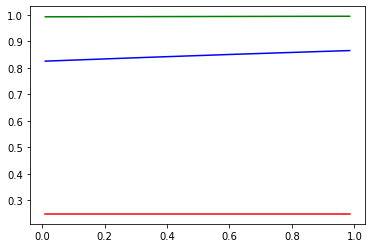

<Figure size 432x288 with 0 Axes>

In [9]:
#stable x1 = J=0
zz = np.arange(0.01,0.99,1/200)

X11 = [[0, Z] for Z in zz]
X22 = [[10, Z] for Z in zz]
X33 = [[20, Z] for Z in zz]
X11 = np.array(X11)
print(zz.shape, X11.shape)
plt.plot(zz, model.predict(X11),color = 'r' )
plt.plot(zz, model.predict(X22), color = 'b')
plt.plot(zz, model.predict(X33),color = 'g')
plt.show()
plt.savefig('A0.001_B0.001/plt.png')

In [10]:
print(model.get_weights())

[array([[0.24630013, 0.24630013, 0.24630013, 0.24630013, 0.24630013],
       [0.23532025, 0.23532025, 0.23532025, 0.23532025, 0.23532025]]), array([-0.26374705, -0.26374705, -0.26374705, -0.26374705, -0.26374705]), array([[0.27956721, 0.27956721, 0.27956721],
       [0.27956721, 0.27956721, 0.27956721],
       [0.27956721, 0.27956721, 0.27956721],
       [0.27956721, 0.27956721, 0.27956721],
       [0.27956721, 0.27956721, 0.27956721]]), array([-0.29108757, -0.29108757, -0.29108757]), array([[0.31732853],
       [0.31732853],
       [0.31732853]]), array([-1.10245197])]
